# Пример понижения размерности с помощью PCA

In [1]:
import numpy as np

In [2]:
train = np.loadtxt('data/digit/train.csv', delimiter=',', skiprows=1)

In [3]:
# Сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обработки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))

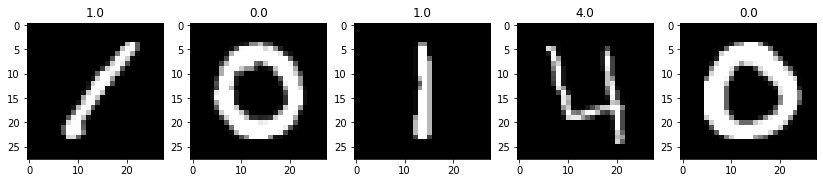

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1])

In [11]:
train_img.shape

(42000, 28, 28)

In [6]:
# выбираем данные для обработки
choices = np.random.choice(train_img.shape[0], 10000)

y = train_label[choices]
X = train_img[choices].reshape(-1, 28 * 28).astype(np.float32)

In [12]:
X.shape

(10000, 784)

In [8]:
# центрируем данные
X_mean = X.mean(axis=0)
X -= X_mean

In [13]:
X_mean.shape

(784,)

In [9]:
# матрица ковариации признаков
cov = np.dot(X.T, X) / X.shape[0]

In [14]:
cov.shape

(784, 784)

In [10]:
U, S, _ = np.linalg.svd(cov)
# U - собственные вектора матрицы ковариации
# S - собственные значения

In [15]:
U.shape

(784, 784)

In [21]:
U[:, 0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.51990690e-07,
        2.29250072e-05,  4.84010234e-05,  1.04245781e-04,  1.90397608e-04,
        1.15882089e-04,  2.10670638e-04,  2.03780597e-04, -1.48413019e-05,
       -4.78162801e-05,  1.94813965e-05, -6.06982348e-06, -2.30155729e-06,
       -2.69903630e-05, -1.51264601e-06,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

## Собственные числа

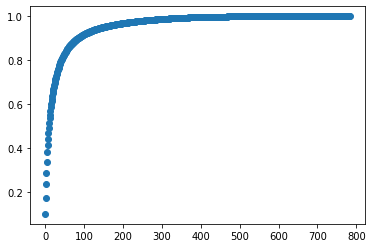

In [22]:
# накопленная сумма собственных значений
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [23]:
S_cumsum[100]

0.91801447

In [24]:
for i in range(5):
    print('[%03d] %.3f' % (i, S_cumsum[i]))

[000] 0.099
[001] 0.172
[002] 0.233
[003] 0.287
[004] 0.336


## Понижаем размерность

In [29]:
S_thr = .90 # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=84 S=0.900


In [30]:
# получаем сжатое представление объектов
Xrot_reduced = np.dot(X, U[:, :n_comp])

In [31]:
U[:, :n_comp].shape

(784, 84)

In [32]:
Xrot_reduced.shape

(10000, 84)

In [33]:
X.shape

(10000, 784)